# Probabilities of Winning a Lottery
### Building an App to help players estimate their chances


![image](lottery.jpg)

**Scenario**

In this project, we are going to contribute to the development of a mobile app by writing a couple of functions that are mostly focused on calculating probabilities. The app is aimed to both prevent and treat lottery addiction by helping people better estimate their chances of winning.

The app idea comes from a medical institute which is specialized in treating gambling addictions. The institute already has a team of engineers that will build the app, but they need us to create the logical core of the app and calculate probabilities. For the first version of the app, they want us to focus on the [6/49](https://en.wikipedia.org/wiki/Lotto_6/49) lottery and build functions that can answer users the following questions:

* What is the probability of winning the big prize with a single ticket?
* What is the probability of winning the big prize if we play 40 different tickets (or any other number)?
* What is the probability of having at least five (or four, or three) winning numbers on a single ticket?

The scenario we're following throughout this project is fictional — the main purpose is to practice applying probability and combinatorics (permutations and combinations) concepts in a setting that simulates a real-world scenario.

## Core Functions

Below, we're going to write two functions that we'll be using frequently. In order to find probabilities, we need to find the fantorial and combinations. 

Here is what we need to know:
* In the 6/49 lottery, six numbers are drawn from a set of 49 numbers that range from 1 to 49. The drawing is done without replacement, which means once a number is drawn, it's not put back in the set.

We will use this info to write our combinations function. 

In [1]:
def factorial(n):
    total = 1
    for i in range(n):
        total *= (n-i)
    return total 

def combinations(n, k):
    numerator = factorial(n)
    denominator = factorial(k) * factorial(n-k)
    return numerator/denominator 


## One ticket probability

We need to build a function that calculates the probability of winning the big prize for any given ticket. For each drawing, six numbers are drawn from a set of 49, and a player wins the big prize if the six numbers on their tickets match all six numbers.

The engineer team told us that we need to be aware of the following details when we write the function:

* Inside the app, the user inputs six different numbers from 1 to 49.
* Under the hood, the six numbers will come as a Python list and serve as an input to our function.
* The engineering team wants the function to print the probability value in a friendly way — in a way that people without any probability training are able to understand.

Below, we write the one_ticket_probability() function, which takes in a list of six unique numbers and prints the probability of winning in a way that's easy to understand.

In [2]:
def one_ticket_probability(array):
    total_outcomes = combinations(49, 6)
    probability = 1/total_outcomes * 100
    return f'Your probability of winning the big prize with the number {array} is {probability :.7f}%' 




We now test a bit the function on two different outputs.

In [3]:
test_input_1 = [2, 43, 22, 23, 11, 5]
one_ticket_probability(test_input_1)

'Your probability of winning the big prize with the number [2, 43, 22, 23, 11, 5] is 0.0000072%'

In [4]:
test_input_2 = [9, 26, 41, 7, 15, 6]
one_ticket_probability(test_input_2)

'Your probability of winning the big prize with the number [9, 26, 41, 7, 15, 6] is 0.0000072%'

## Historical Data Check for Canada Lottery

The institute also wants us to consider the data coming from the national 6/49 lottery game in Canada. The data set contains historical data for 3,665 drawings, dating from 1982 to 2018 (the data set can be downloaded from [here](https://www.kaggle.com/datascienceai/lottery-dataset)).

In [5]:
import pandas as pd 
canada_lottery = pd.read_csv('649.csv')
canada_lottery.shape

(3665, 11)

In [6]:
canada_lottery.head(3)

PRODUCT  DRAW NUMBER  SEQUENCE NUMBER  DRAW DATE  NUMBER DRAWN 1  \
0      649            1                0  6/12/1982               3   
1      649            2                0  6/19/1982               8   
2      649            3                0  6/26/1982               1   

   NUMBER DRAWN 2  NUMBER DRAWN 3  NUMBER DRAWN 4  NUMBER DRAWN 5  \
0              11              12              14              41   
1              33              36              37              39   
2               6              23              24              27   

   NUMBER DRAWN 6  BONUS NUMBER  
0              43            13  
1              41             9  
2              39            34

In [7]:
canada_lottery.tail(3)

PRODUCT  DRAW NUMBER  SEQUENCE NUMBER  DRAW DATE  NUMBER DRAWN 1  \
3662      649         3589                0  6/13/2018               6   
3663      649         3590                0  6/16/2018               2   
3664      649         3591                0  6/20/2018              14   

      NUMBER DRAWN 2  NUMBER DRAWN 3  NUMBER DRAWN 4  NUMBER DRAWN 5  \
3662              22              24              31              32   
3663              15              21              31              38   
3664              24              31              35              37   

      NUMBER DRAWN 6  BONUS NUMBER  
3662              34            16  
3663              49             8  
3664              48            17

## Function for Historical Data Check

The engineering team tells us that we need to write a function that can help users determine whether they would have ever won by now using a certain combination of six numbers. These are the details we'll need to be aware of:

* Inside the app, the user inputs six different numbers from 1 to 49.
* Under the hood, the six numbers will come as a Python list and serve as an input to our function.
* The engineering team wants us to write a function that prints:
    * the number of times the combination selected occurred; and
    * the probability of winning the big prize in the next drawing with that combination.

We're going to begin by extracting all the winning numbers from the lottery data set. The extract_numbers() function will go over each row of the dataframe and extract the six winning numbers as a Python set.

In [8]:
def extract_numbers(row):
    row = row[4:10]
    row = set(row.values)
    return row 

winning_numbers = canada_lottery.apply(extract_numbers, axis=1)
winning_numbers.head()
    

0    {3, 41, 11, 12, 43, 14}
1    {33, 36, 37, 39, 8, 41}
2     {1, 6, 39, 23, 24, 27}
3     {3, 9, 10, 43, 13, 20}
4    {34, 5, 14, 47, 21, 31}
dtype: object


Below, we write the check_historical_occurrence() function that takes in the user numbers and the historical numbers and prints information with respect to the number of occurrences and the probability of winning in the next drawing.

In [9]:
def check_historical_occurrence(user_input, winning_numbers):
    user_input = set(user_input)
    check_occurance = user_input == winning_numbers 
    n_occurances = sum(check_occurance)
    
    if n_occurances > 0:
        print(f"The number of times combination {user_input} has occured in the past is {n_occurances}. Your chances to win the big prize in the next drawing using the combination {user_input} are 0.0000072%. In other words, you have a 1 in 13,983,816 chances to win.")
    else:
        print(f"The combination {user_input} has never occured. This doesn't mean it's more likely to occur now. Your chances to win the big prize in the next drawing using the combination {user_input} are 0.0000072%.In other words, you have a 1 in 13,983,816 chances to win.")

In [10]:
test_input_3 = [33, 36, 37, 39, 8, 41]
check_historical_occurrence(test_input_3, winning_numbers)

The number of times combination {33, 36, 37, 39, 8, 41} has occured in the past is 1. Your chances to win the big prize in the next drawing using the combination {33, 36, 37, 39, 8, 41} are 0.0000072%. In other words, you have a 1 in 13,983,816 chances to win.


In [11]:
test_input_4 = [3, 2, 44, 22, 1, 44]
check_historical_occurrence(test_input_4, winning_numbers)

The combination {1, 2, 3, 44, 22} has never occured. This doesn't mean it's more likely to occur now. Your chances to win the big prize in the next drawing using the combination {1, 2, 3, 44, 22} are 0.0000072%.In other words, you have a 1 in 13,983,816 chances to win.


## Multi-ticket Probability 

For the first version of the app, users should also be able to find the probability of winning if they play multiple different tickets. For instance, someone might intend to play 15 different tickets and they want to know the probability of winning the big prize.

The engineering team wants us to be aware of the following details when we're writing the function:

* The user will input the number of different tickets they want to play (without inputting the specific combinations they intend to play).
* Our function will see an integer between 1 and 13,983,816 (the maximum number of different tickets).
* The function should print information about the probability of winning the big prize depending on the number of different tickets played.

The multi_ticket_probability() function below takes in the number of tickets and prints probability information depending on the input.

In [12]:
def multi_ticket_probability(n_tickets):
    total_outcomes = combinations(49, 6)
    probability = n_tickets/total_outcomes * 100
    combinations_simplified = round(total_outcomes/n_tickets)
    print(f"Your chances to win the big prize with {n_tickets :,} different tickets are {probability :.6f}%.In other words, you have a 1 in {combinations_simplified :,} chances to win.")

In [13]:
test_inputs = [1, 10, 100, 10000, 1000000, 6991908, 13983816]

for test_input in test_inputs:
    multi_ticket_probability(test_input)
    print('------------------------') # output delimiter

Your chances to win the big prize with 1 different tickets are 0.000007%.In other words, you have a 1 in 13,983,816 chances to win.
------------------------
Your chances to win the big prize with 10 different tickets are 0.000072%.In other words, you have a 1 in 1,398,382 chances to win.
------------------------
Your chances to win the big prize with 100 different tickets are 0.000715%.In other words, you have a 1 in 139,838 chances to win.
------------------------
Your chances to win the big prize with 10,000 different tickets are 0.071511%.In other words, you have a 1 in 1,398 chances to win.
------------------------
Your chances to win the big prize with 1,000,000 different tickets are 7.151124%.In other words, you have a 1 in 14 chances to win.
------------------------
Your chances to win the big prize with 6,991,908 different tickets are 50.000000%.In other words, you have a 1 in 2 chances to win.
------------------------
Your chances to win the big prize with 13,983,816 different

## Other Winning Numbers

In most 6/49 lotteries, there are smaller prizes if a player's ticket match two, three, four, or five of the six numbers drawn. This means that players might be interested in finding out the probability of having two, three, four, or five winning numbers — for the first version of the app, users should be able to find those probabilities.

These are the details we need to be aware of when we write a function to make the calculations of those probabilities possible:

* Inside the app, the user inputs:
    * six different numbers from 1 to 49; and
    * an integer between 2 and 5 that represents the number of winning numbers expected
* Our function prints information about the probability of having a certain number of winning numbers

To calculate the probabilities, we tell the engineering team that the specific combination on the ticket is irrelevant and we only need the integer between 2 and 5 representing the number of winning numbers expected. Consequently, we will write a function named probability_less_6() which takes in an integer and prints information about the chances of winning depending on the value of that integer.

In [14]:
def probability_less_6(n_winning_numbers):
    
    n_combinations_ticket = combinations(6, n_winning_numbers)
    n_combinations_remaining = combinations(49 - n_winning_numbers,
                                           6 - n_winning_numbers)
    successful_outcomes = n_combinations_ticket * n_combinations_remaining
    n_combinations_total = combinations(49, 6)
    
    probability = successful_outcomes / n_combinations_total
    probability_percentage = probability * 100
    
    combinations_simplified = round(n_combinations_total/successful_outcomes)
    
    print('''Your chances of having {} winning numbers with this ticket are {:.3f}%.
In other words, you have a 1 in {:,} chances to win.'''.format(n_winning_numbers, probability_percentage,
                                                               int(combinations_simplified)))

In [15]:
for test_input in [2, 3, 4, 5]:
    probability_less_6(test_input)
    print('--------------------------') # output delimiter

Your chances of having 2 winning numbers with this ticket are 19.133%.
In other words, you have a 1 in 5 chances to win.
--------------------------
Your chances of having 3 winning numbers with this ticket are 2.171%.
In other words, you have a 1 in 46 chances to win.
--------------------------
Your chances of having 4 winning numbers with this ticket are 0.106%.
In other words, you have a 1 in 942 chances to win.
--------------------------
Your chances of having 5 winning numbers with this ticket are 0.002%.
In other words, you have a 1 in 52,969 chances to win.
--------------------------


## Adding Fun Examples 

As the last step in our project, we will add probabilities of strange events and compare them with the chances of winning in lottery. 

In [67]:
from IPython.display import Image, display

def fun_probability(n_tickets):
    total_outcomes = combinations(49, 6)
    probability = n_tickets/total_outcomes * 100
    combinations_simplified = round(total_outcomes/n_tickets)
    if n_tickets == 1: 
        message = (
            f"Your chances to win the big prize with 1 ticket is {probability :.6f}% 1 in {combinations_simplified :,} \n" 
            f"In other words, you are more likely to be attacked by a shark than winning the big prize."
        )
        image = Image(filename='shark.jpg', width=400)
        display(image)
        print(message)
        
        
    elif n_tickets == 10:
        message = (
            f"Your chances to win the big prize with 10 tickets are {probability :.6f}% or 1 in {combinations_simplified :,} \n" 
            f"In other words, you are more likely to be hit by a lightning than winning the big prize."
        )
        image = Image(filename='lightning.jpg', width=400)
        display(image)
        print(message)
    elif n_tickets == 20:
        message = (
            f"Your chances to win the big prize with 20 tickets are {probability :.6f}% or 1 in {combinations_simplified :,} \n" 
            f"In other words, you are more likely to win an Olympic gold medal than winning the big prize."
        )
        image = Image(filename='rio_gold.jpg', width=400)
        display(image)
        print(message)
    
    else: 
        print(f"Your chances to win the big prize with {n_tickets :,} different tickets are {probability :.6f}%. \nIn other words, you have a 1 in {combinations_simplified :,} chances to win.")  

Now let's test out several scenarios

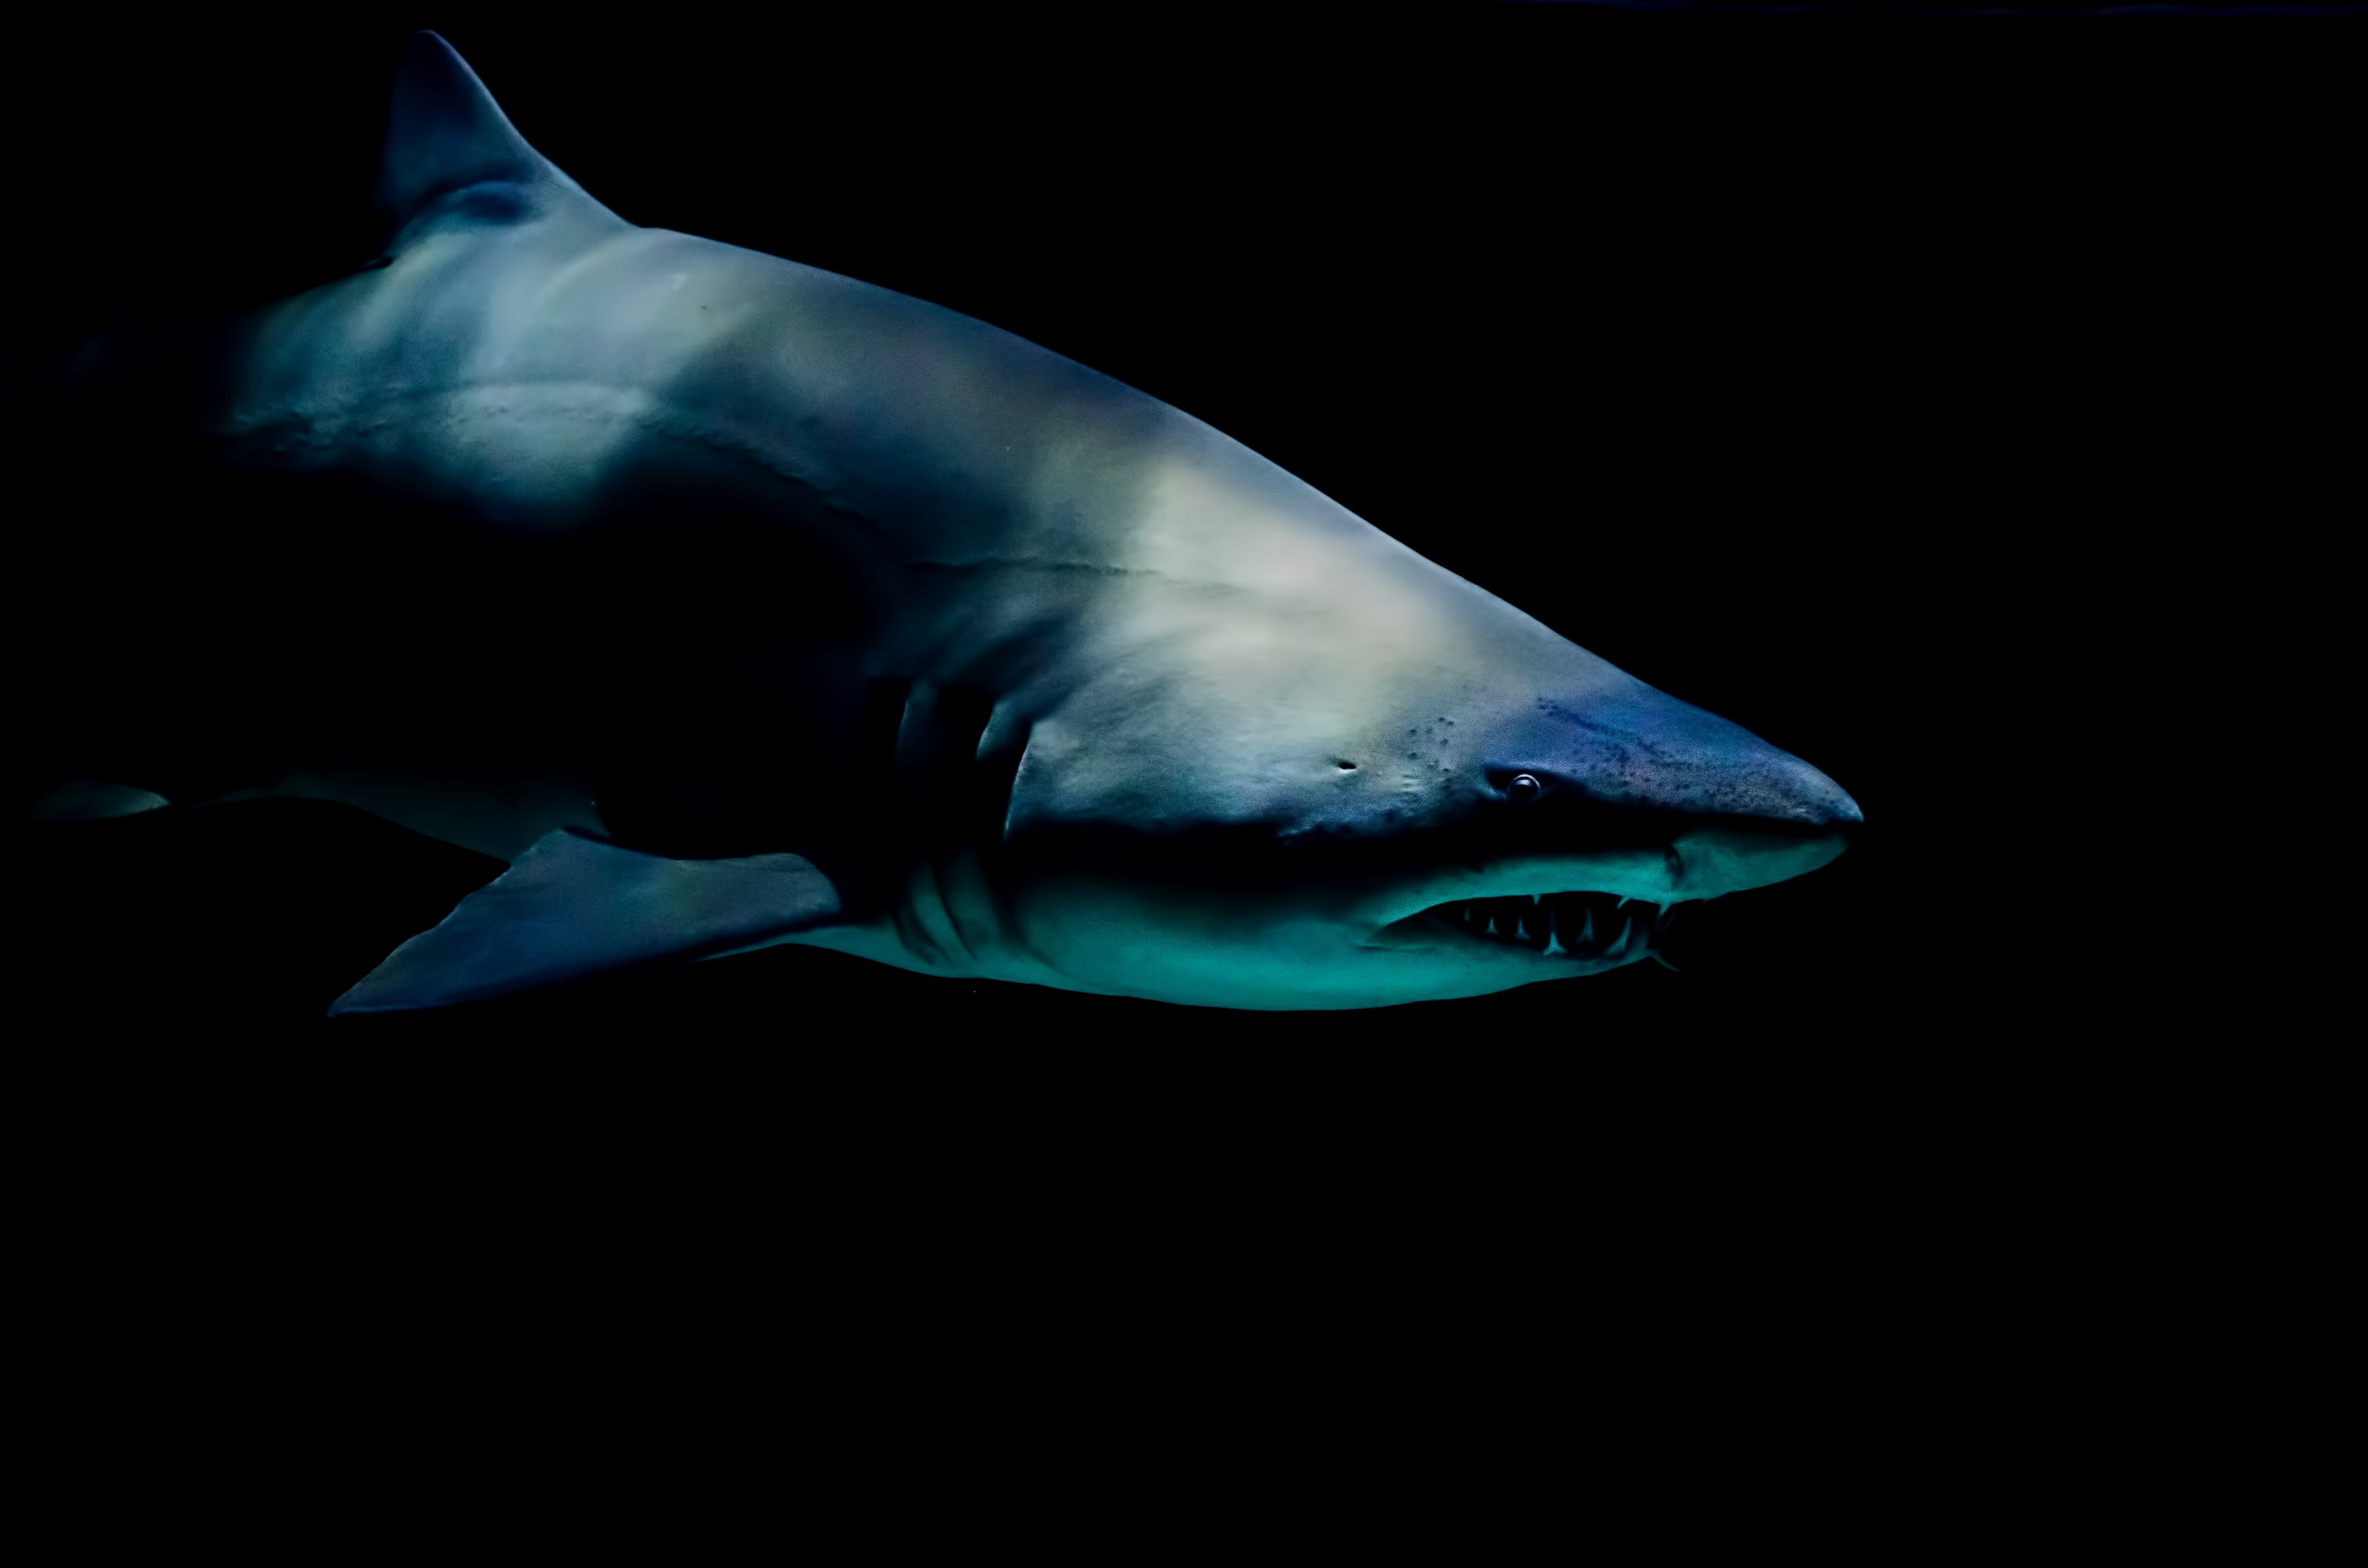

Your chances to win the big prize with 1 ticket is 0.000007% 1 in 13,983,816 
In other words, you are more likely to be attacked by a shark than winning the big prize.
--------------------------


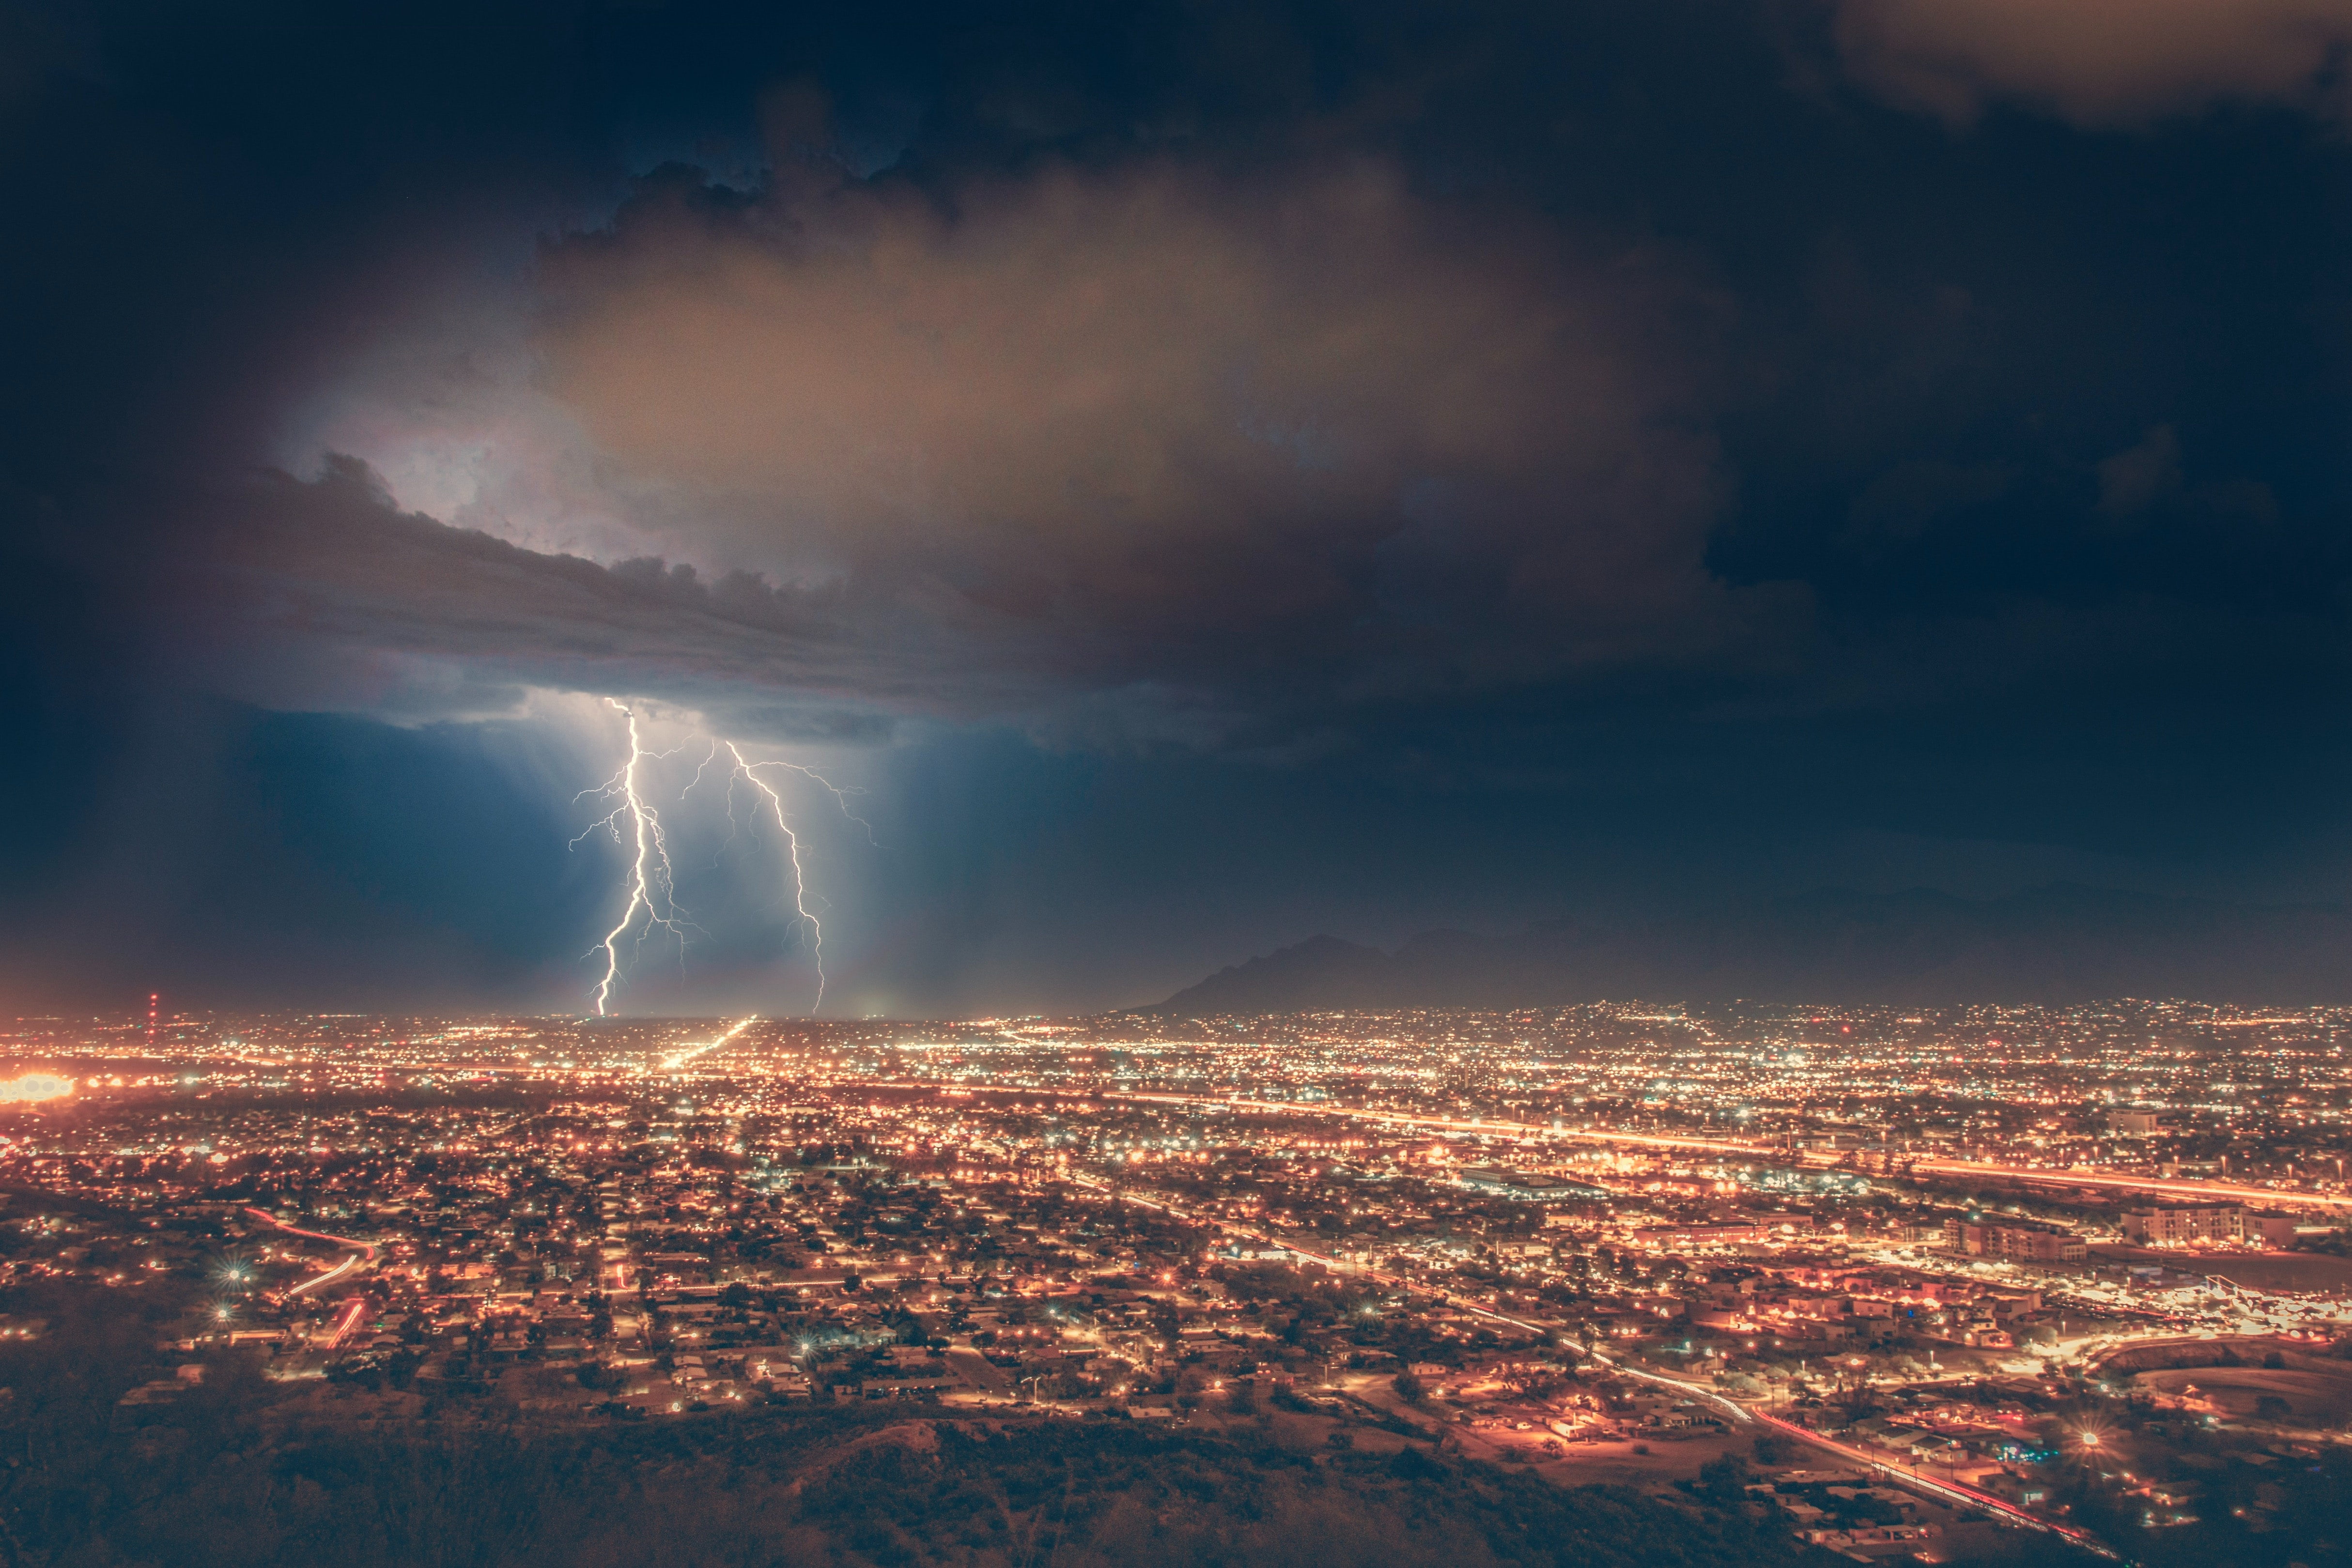

Your chances to win the big prize with 10 tickets are 0.000072% or 1 in 1,398,382 
In other words, you are more likely to be hit by a lightning than winning the big prize.
--------------------------


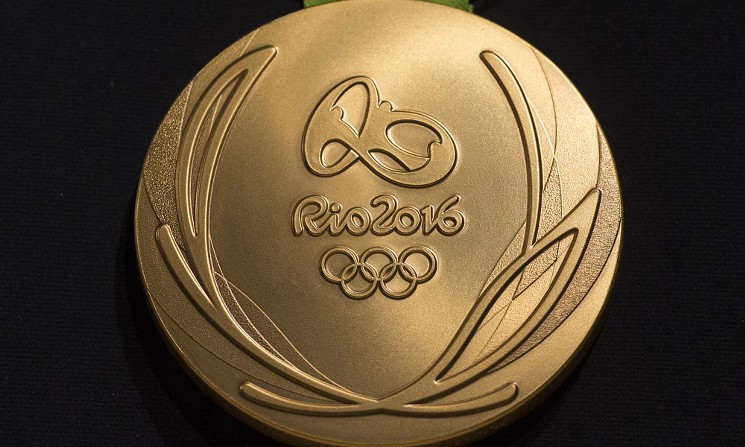

Your chances to win the big prize with 20 tickets are 0.000143% or 1 in 699,191 
In other words, you are more likely to win an Olympic gold medal than winning the big prize.
--------------------------
Your chances to win the big prize with 50 different tickets are 0.000358%. 
In other words, you have a 1 in 279,676 chances to win.
--------------------------


In [71]:
for test_input in [1, 10, 20, 50]:
    fun_probability(test_input)
    print('--------------------------') # output delimiter